In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

In [2]:
# Import cleaned datasets
MRM=pd.read_csv('../DL/mean_ratings_yearmonth.csv')
# Next, reshape datasets

In [9]:
import statsmodels.api as sm
from random import random
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
from matplotlib.backends.backend_pdf import PdfPages
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import adfuller

In [29]:
#plt.rc('text', usetex=True)
sns.set_style("ticks")
sns.set_context("paper",font_scale=2.0)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Gentium'], 'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Gentium'
matplotlib.rcParams['mathtext.it'] = 'Gentium:italic'
matplotlib.rcParams['mathtext.bf'] = 'Gentium:bold'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_custom_preamble = {
"font.family": "serif", # use serif/main font for text elements
"text.usetex": False,    # use inline math for ticks
"pgf.preamble": [
    "\\usepackage{mathpazo}",
    "\\usepackage{gentium}",
    "\\DeclareSymbolFont{sfnumbers}{T1}{gentium}{m}{n}",
    "\\SetSymbolFont{sfnumbers}{bold}{T1}{gentium}{bx}{n}",
    "\\DeclareMathSymbol{0}\mathalpha{sfnumbers}{\"30}",
    "\\DeclareMathSymbol{1}\mathalpha{sfnumbers}{\"31}",
    "\\DeclareMathSymbol{2}\mathalpha{sfnumbers}{\"32}",
    "\\DeclareMathSymbol{3}\mathalpha{sfnumbers}{\"33}",
    "\\DeclareMathSymbol{4}\mathalpha{sfnumbers}{\"34}",
    "\\DeclareMathSymbol{5}\mathalpha{sfnumbers}{\"35}",
    "\\DeclareMathSymbol{6}\mathalpha{sfnumbers}{\"36}",
    "\\DeclareMathSymbol{7}\mathalpha{sfnumbers}{\"37}",
    "\\DeclareMathSymbol{8}\mathalpha{sfnumbers}{\"38}",
    "\\DeclareMathSymbol{9}\mathalpha{sfnumbers}{\"39}",
    "\\DeclareMathSymbol{,}\mathalpha{sfnumbers}{\"2C}"
    ]
}
matplotlib.rcParams.update(pgf_with_custom_preamble)

In [10]:
# Consider months first
Months_M=MRM.pivot(index='rating_date',columns='genres',values='rating')

In [11]:
Months_M

genres,Action,Adventure,Comedy,Crime,Drama,Fantasy,Romance,Sci-Fi,Thriller
rating_date,,,,,,,,,
1997-09,3.497851,3.614968,3.547915,3.722609,3.706409,3.587582,3.645617,3.594025,3.519164
1997-10,3.505801,3.590452,3.468590,3.695402,3.665669,3.527335,3.598263,3.597502,3.497024
1997-11,3.411883,3.529372,3.466164,3.669048,3.664561,3.543101,3.590192,3.513699,3.437533
1997-12,3.424951,3.537306,3.461299,3.664982,3.640967,3.507917,3.553970,3.518480,3.425153
1998-01,3.369930,3.474170,3.345554,3.540208,3.507089,3.402778,3.496704,3.455460,3.376575
...,...,...,...,...,...,...,...,...,...
2018-05,3.517145,3.544951,3.438787,3.703371,3.699815,3.494306,3.546896,3.546816,3.563887
2018-06,3.545266,3.575223,3.467511,3.724195,3.716126,3.531271,3.598700,3.579804,3.577264
2018-07,3.525763,3.551949,3.449227,3.724967,3.695628,3.498392,3.516012,3.568202,3.563761


In [12]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)

    if ts_test[1] <= cutoff:
        print('Reject--Stationary')
    else:
        print('Not reject--Not Stationary')

In [13]:
# First of all, test stationary
for i in Months_M.columns:
    print('Genre: '+i)
    TestStationaryAdfuller(Months_M[i])

Genre: Action
Test Statistic                  -2.041668
p-value                          0.268607
#Lags Used                       4.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
Not reject--Not Stationary
Genre: Adventure
Test Statistic                  -2.495656
p-value                          0.116535
#Lags Used                       4.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
Not reject--Not Stationary
Genre: Comedy
Test Statistic                  -2.337567
p-value                          0.160138
#Lags Used                       5.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)           

In [16]:
# After test, only the Fantasy series is stationary
# Then consider extracting the difference
Dif_DT=pd.DataFrame()
for i in Months_M.columns:
    if i!='Fantasy':
        Dif=Months_M[i]-Months_M[i].shift(1)
        # Remove the seasonal trend
        Dif_sea=Dif-Dif.shift(12)
        s='Dif_'+i
        Dif_DT[s]=Dif_sea
        print('Difference of '+i)
        TestStationaryAdfuller(Dif_sea.dropna(inplace=False))
    else:
        Dif_DT[i]=Months_M[i]

Difference of Action
Test Statistic                -6.804939e+00
p-value                        2.188880e-09
#Lags Used                     1.200000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64
Reject--Stationary
Difference of Adventure
Test Statistic                -5.785495e+00
p-value                        5.010705e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64
Reject--Stationary
Difference of Comedy
Test Statistic                  -5.579406
p-value                          0.000001
#Lags Used                      13.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.87441

In [17]:
# Now testing the white noise
for i in Dif_DT.columns:
    s=Dif_DT[i].copy()
    s.dropna(inplace=True)
    r,q,p = sm.tsa.acf(s.values.squeeze(), qstat=True) 
    data = np.c_[range(1,41), r[1:], q, p] 
    table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"]) 
    print('Group: '+i)
    print(table.set_index('lag'))
# From the result all of the time series can reject the white noise hypothesis

Group: Dif_Action
            AC           Q      Prob(>Q)
lag                                     
1.0  -0.472001   54.139453  1.867536e-13
2.0   0.029208   54.347641  1.579646e-12
3.0  -0.059017   55.201185  6.220041e-12
4.0   0.035075   55.503958  2.547631e-11
5.0  -0.012691   55.543765  1.008871e-10
6.0  -0.040441   55.949705  2.979925e-10
7.0   0.017977   56.030262  9.314195e-10
8.0   0.062391   57.004778  1.796876e-09
9.0  -0.080367   58.628712  2.461466e-09
10.0  0.040883   59.050776  5.478147e-09
11.0  0.208218   70.046546  1.197037e-10
12.0 -0.460593  124.087876  9.436755e-21
13.0  0.222050  136.703334  9.616052e-23
14.0 -0.005859  136.712156  3.190905e-22
15.0  0.061920  137.701866  6.532307e-22
16.0 -0.026332  137.881654  1.870764e-21
17.0 -0.027571  138.079636  5.147010e-21
18.0  0.071928  139.433166  8.235604e-21
19.0 -0.021716  139.557101  2.218452e-20
20.0 -0.090341  141.711716  2.395084e-20
21.0  0.113860  145.149888  1.459383e-20
22.0 -0.083520  147.008339  1.751349e-2

In [76]:
# Start fitting SARMA model
def SAR(p,q,P,Q,col,d=1,D=1):
    ordi=(p,d,q)
    seas=(P,D,Q,12)
    model=SARIMAX(Months_M[col],order=ordi,seasonal_order=seas)
    model_fit=model.fit(disp=False)
    t=model_fit.predict(1,)
    lab=model_fit.predict().index
    pred=Months_M.copy()[col]
    pred.iloc[1:]=t
    pred.index=lab
    init=Months_M[col].copy()
    init.index=lab
    S=model_fit.params
    PS=pd.DataFrame(S,columns=['params'])
    PS['CI_2.5%']=model_fit.conf_int()[0]
    PS['CI_97.5%']=model_fit.conf_int()[1]
    return [PS,pred,init,model_fit]

In [77]:
#pdf = PdfPages("SARMA_mean.pdf")

In [78]:
Months_M

genres,Action,Adventure,Comedy,Crime,Drama,Fantasy,Romance,Sci-Fi,Thriller
rating_date,,,,,,,,,
1997-09,3.497851,3.614968,3.547915,3.722609,3.706409,3.587582,3.645617,3.594025,3.519164
1997-10,3.505801,3.590452,3.468590,3.695402,3.665669,3.527335,3.598263,3.597502,3.497024
1997-11,3.411883,3.529372,3.466164,3.669048,3.664561,3.543101,3.590192,3.513699,3.437533
1997-12,3.424951,3.537306,3.461299,3.664982,3.640967,3.507917,3.553970,3.518480,3.425153
1998-01,3.369930,3.474170,3.345554,3.540208,3.507089,3.402778,3.496704,3.455460,3.376575
...,...,...,...,...,...,...,...,...,...
2018-05,3.517145,3.544951,3.438787,3.703371,3.699815,3.494306,3.546896,3.546816,3.563887
2018-06,3.545266,3.575223,3.467511,3.724195,3.716126,3.531271,3.598700,3.579804,3.577264
2018-07,3.525763,3.551949,3.449227,3.724967,3.695628,3.498392,3.516012,3.568202,3.563761


/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
No handles with labels found to put in legend.


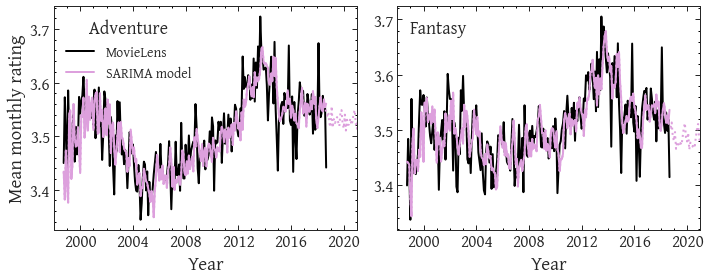

In [84]:
Dic_result=dict()
Predictor=dict()

cols =sns.color_palette()

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
for i in range(0,2):
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_ticks_position('both')
    ax[i].tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    #ax[i].ticklabel_format(axis="y", style="sci", scilimits=(0,0))


for i,genre in enumerate(['Adventure', 'Fantasy']): # Months_M.columns
    if genre!='Fantasy' and genre!='Thriller':
        New=SAR(1,1,1,1,genre,1,1)
    elif genre=='Fantasy':
        New=SAR(1,1,1,1,genre,0,0)
    else:
        New=SAR(1,1,1,1,genre,1,1)
    Dic_result[genre]=New[0]
    Predictor[genre]=New[3]
    ftr=New[3].forecast(steps=120)
    if(i==0):
        ax[i].plot(New[2][13:], color = 'k', lw=2, label='MovieLens')
        ax[i].plot(New[1][13:], color = 'plum', lw=2, label='SARIMA model')
    else:
        ax[i].plot(New[2][13:], color = 'k', lw=2)
        ax[i].plot(New[1][13:], color = 'plum', lw=2)
    ax[i].plot(ftr.append(New[1][13:].iloc[:-1]).sort_index(), color='plum', linestyle='dotted', lw=2)
    #plt.text('2001-01-01', 3.7, genre)
    ax[i].legend(title=genre, frameon=False, loc=2, title_fontsize=18, fontsize=14)
    ax[i].set_xlim('1998-01-01', '2021-01-01')
    ax[i].set_xlabel(r'Year')
ax[0].set_ylabel(r'Mean monthly rating')
plt.tight_layout()
plt.savefig('sarima.eps')

/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.
/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.
/home/sbg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165

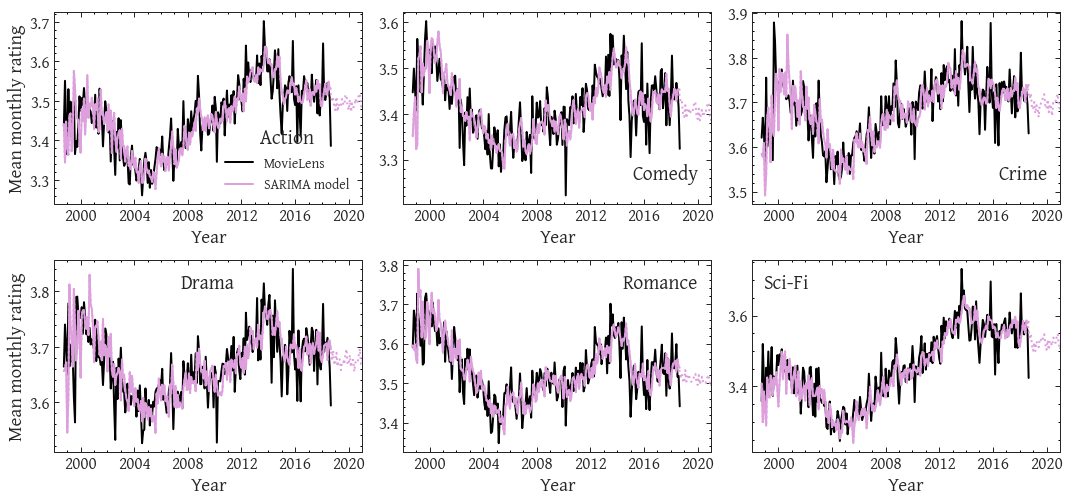

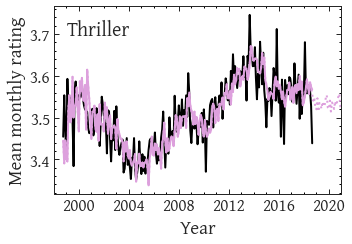

In [85]:
Dic_result=dict()
Predictor=dict()

cols =sns.color_palette()

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,7))
inds = []
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].yaxis.set_ticks_position('both')
        ax[i,j].xaxis.set_ticks_position('both')
        ax[i,j].tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
        ax[i,j].xaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].yaxis.set_minor_locator(AutoMinorLocator())
        inds.append((i,j))

#Still missing Thriller

for i,genre in enumerate(['Action', 'Comedy', 'Crime', 'Drama', 'Romance', 'Sci-Fi']): # Months_M.columns
    if genre!='Fantasy' and genre!='Thriller':
        New=SAR(1,1,1,1,genre,1,1)
    elif genre=='Fantasy':
        New=SAR(1,1,1,1,genre,0,0)
    else:
        New=SAR(1,1,1,1,genre,1,1)
    Dic_result[genre]=New[0]
    Predictor[genre]=New[3]
    ftr=New[3].forecast(steps=120)
    if(i==0):
        ax[inds[i]].plot(New[2][13:], color = 'k', lw=2, label='MovieLens')
        ax[inds[i]].plot(New[1][13:], color = 'plum', lw=2, label='SARIMA model')
    else:
        ax[inds[i]].plot(New[2][13:], color = 'k', lw=2)
        ax[inds[i]].plot(New[1][13:], color = 'plum', lw=2)
    ax[inds[i]].plot(ftr.append(New[1][13:].iloc[:-1]).sort_index(), color='plum', linestyle='dotted', lw=2)
    #plt.text('2001-01-01', 3.7, genre)
    ax[inds[i]].legend(title=genre, frameon=False, loc='best', title_fontsize=20, fontsize=14)
    ax[inds[i]].set_xlim('1998-01-01', '2021-01-01')
    ax[inds[i]].set_xlabel(r'Year')
ax[0,0].set_ylabel(r'Mean monthly rating')
ax[1,0].set_ylabel(r'Mean monthly rating')
plt.tight_layout()
plt.savefig('sarima_others.eps')

# one final figure
genre='Thriller'
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,3.5))
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
New=SAR(1,1,1,1,genre,1,1) # New=SAR(1,1,1,1,genre)
ftr=New[3].forecast(steps=120)
ax.plot(New[2][13:], color = 'k', lw=2)
ax.plot(New[1][13:], color = 'plum', lw=2)
ax.plot(ftr.append(New[1][13:].iloc[:-1]).sort_index(), color='plum', linestyle='dotted', lw=2)
ax.legend(title=genre, frameon=False, loc='best', title_fontsize=20, fontsize=14)
ax.set_xlim('1998-01-01', '2021-01-01')
ax.set_xlabel(r'Year')
ax.set_ylabel(r'Mean monthly rating')
plt.tight_layout()
plt.savefig('sarima_thriller.eps')

In [530]:
Dic_result

{'Action':             params   CI_2.5%  CI_97.5%
 ar.L1     0.999897  0.999623  1.000171
 ma.L1    -0.734230 -0.750895 -0.717565
 ar.S.L12  0.999834  0.995557  1.004111
 ma.S.L12 -0.994403 -1.067262 -0.921544
 sigma2    0.002232  0.001863  0.002602,
 'Adventure':             params   CI_2.5%  CI_97.5%
 ar.L1     0.999991  0.999871  1.000111
 ma.L1    -0.750232 -0.837560 -0.662904
 ar.S.L12  0.311810 -0.627262  1.250882
 ma.S.L12 -0.159835 -1.122913  0.803243
 sigma2    0.001984  0.001685  0.002283,
 'Comedy':             params   CI_2.5%  CI_97.5%
 ar.L1     0.999886  0.998033  1.001739
 ma.L1    -0.727513 -0.823241 -0.631785
 ar.S.L12  0.998232  0.942683  1.053780
 ma.S.L12 -0.989022 -1.168396 -0.809648
 sigma2    0.002188  0.001807  0.002568,
 'Crime':             params   CI_2.5%  CI_97.5%
 ar.L1     0.999999  0.999992  1.000007
 ma.L1    -0.584706 -0.599234 -0.570178
 ar.S.L12  0.999331  0.996477  1.002185
 ma.S.L12 -0.662133 -0.663328 -0.660939
 sigma2    0.002547  0.002252  0.00